In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:

with h5py.File("results_opt_nograd_All.h5", "r") as f:
    best_loss_powell = f['best_loss'][:]
    iters_powell = f['iters'][:] + 1

file_DE = "../study_opt_model_free/results_DE_40_one_core_merged_All3.h5"

with h5py.File(file_DE, "r") as f:
    fun_de = f["best_loss"][:]
    iters_de = f['iters'][:]


file_CMAES = "../study_opt_model_free/results_CMA_ES_merged_All4.h5"

with h5py.File(file_CMAES, "r") as f:
    fun_cma = f["best_loss"][:]
    iters_cma = f['nfev'][:]


In [3]:
print(fun_de[0])
print(fun_cma[0])
print(best_loss_powell[0])

480.85516775266615
4.538974332791162
740.1157915187858


In [4]:

file_hier = "../study_opt_hierarchical/sloppy_num_1e-3_merged3.h5"

with h5py.File(file_hier, "r") as f:
    fun_hier = f["best_loss"][:]
    iters_hier = f['iters'][:]
    type_hier = f['type'][:]



file_bayes = "../study_opt_hierarchical/bayes_opt.h5"

with h5py.File(file_bayes, "r") as f:
    fun_bayes = f["best_loss"][:]
    iters_bayes = f['iters'][:]

###! shift counting problem
fun_bayes[0] = best_loss_powell[0]

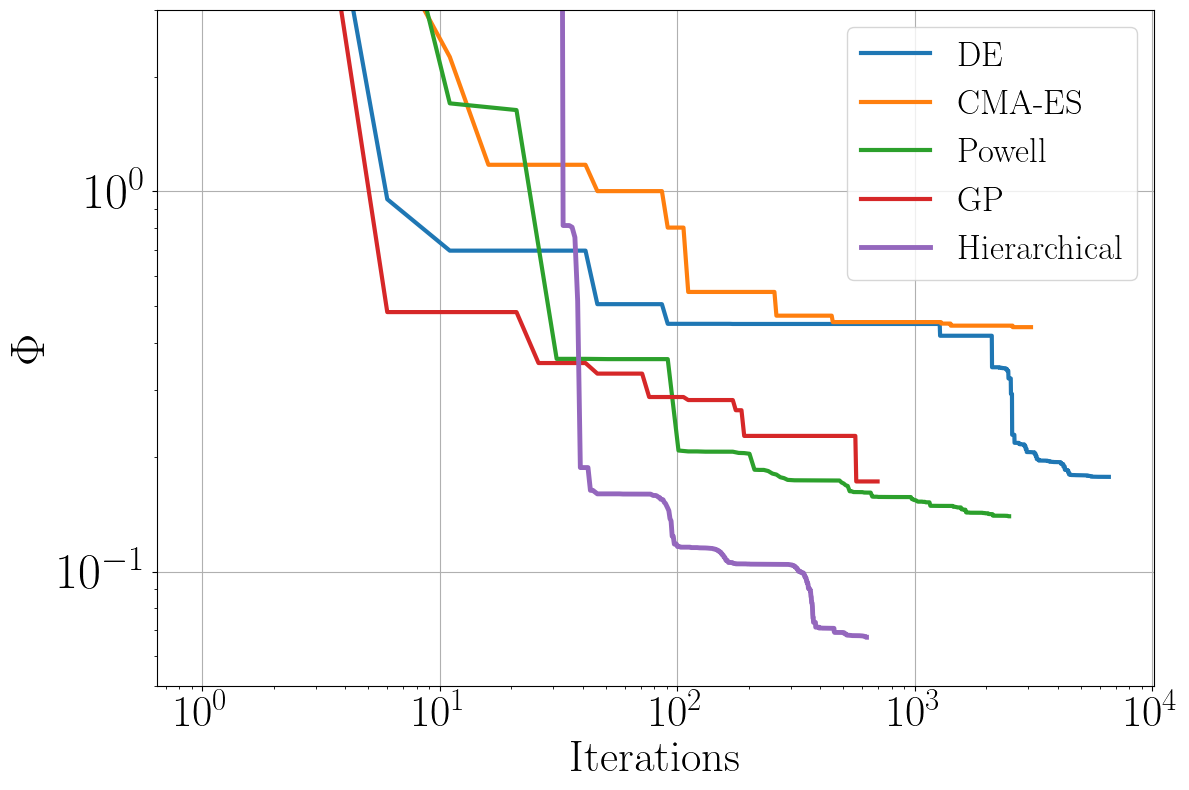

In [8]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(iters_de, fun_de, linewidth=3, label="DE")
ax.plot(iters_cma, fun_cma, linewidth=3, label="CMA-ES")
ax.plot(iters_powell, best_loss_powell, linewidth=3, label="Powell")

ax.plot(iters_bayes, fun_bayes, linewidth=3, label="GP")

ax.plot(iters_hier, fun_hier, linewidth=3.5, label="Hierarchical")
# # ax.plot(iters_hier2[shift_hier:], fun_hier2[shift_hier:], linewidth=3, label="Hierarchical")

plt.xscale('log')
plt.yscale('log')
plt.ylim(0.05, 3.0)
plt.grid()
plt.xlabel(r'Iterations', fontsize=32)
plt.ylabel(r'$\Phi$', fontsize=35)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=36)
ax.legend(fontsize=25)
plt.tight_layout()
plt.savefig("scaling_algos_optimization_merged_all_3.png")
